In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from plotly.offline import init_notebook_mode,iplot
import matplotlib as mpl
import matplotlib.pyplot as plt
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

movies_df = pd.read_csv('datasets/rotten_tomatoes_movies.csv')
reviews_df = pd.read_csv('datasets/rotten_tomatoes_movie_reviews.csv')

In [2]:
movies_df.head(5)

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN
1,the_green_grass,The Green Grass,NaN,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,NaN,NaN,NaN
2,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",NaN,NaN,NaN
3,the_sore_losers_1997,Sore Losers,60.0,NaN,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,NaN,NaN,NaN
4,dinosaur_island_2002,Dinosaur Island,70.0,NaN,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,NaN,NaN,NaN


In [3]:
reviews_df.head(5)

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,http://dcist.com/2015/11/out_of_frame_dangerou...


In [4]:
movies_df.describe()

,audienceScore,tomatoMeter,runtimeMinutes
count,73248.000000,33877.000000,129431.000000
mean,55.674967,65.770346,93.708578
std,24.553648,28.023203,28.129175
min,0.000000,0.000000,1.000000
25%,37.000000,45.000000,84.000000
50%,57.000000,73.000000,92.000000
75%,76.000000,89.000000,103.000000
max,100.000000,100.000000,2700.000000


In [5]:
movies_df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [6]:
reviews_df.replace([np.inf, -np.inf], np.nan, inplace=True)


c:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



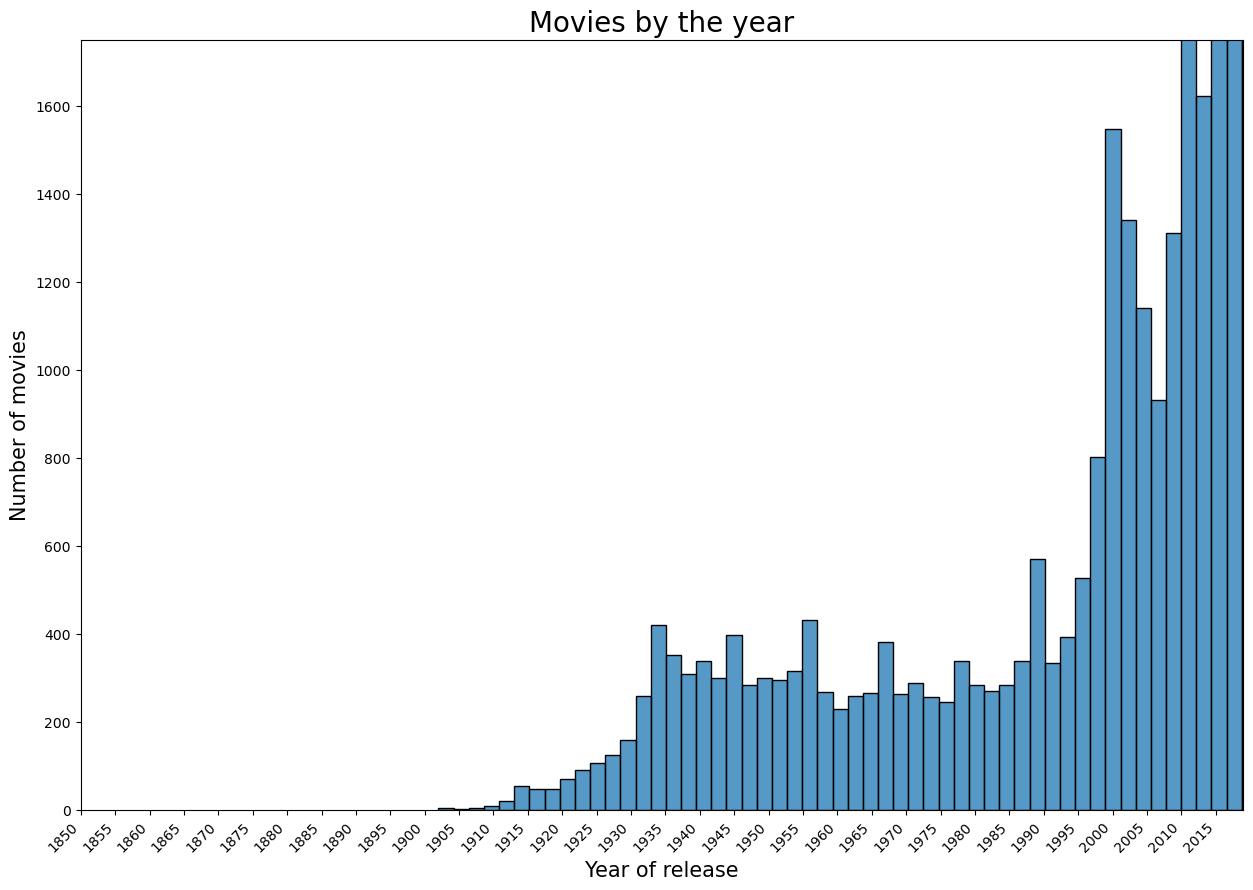

In [7]:
movies_df = movies_df[movies_df.releaseDateTheaters.notnull()]
movies_df['releaseDateTheaters'] = pd.to_datetime(movies_df['releaseDateTheaters'])
movies_df['movie_year'] = movies_df['releaseDateTheaters'].apply(lambda x: x.year)

# sns.set(style="white")

plt.figure(figsize=(15,10))
plt.title('Movies by the year', size=20)
sns.histplot(movies_df.movie_year, kde=False)
plt.ylabel('Number of movies', size=15)
plt.xlabel('Year of release',size=15)
plt.axis([1920, 2019, 0, 1750])
plt.xticks(np.arange(1850, 2018, step=5),rotation=45, ha='right')
plt.show()

In [8]:
reviews_df = reviews_df[reviews_df.creationDate.notnull()]
reviews_df['creationDate'] = pd.to_datetime(reviews_df['creationDate'])
reviews_df['review_year'] = reviews_df['creationDate'].apply(lambda x: x.year)
reviews_df = reviews_df[reviews_df.review_year.astype(int) >= 2000]

plt.figure(figsize=(25,20))
plt.title('Reviews by the year', size=30)
sns.distplot(reviews_df.review_year, bins=30, kde=False)
plt.ylabel('Number of critic reviews', size=25)
plt.xlabel('Year of review posted',size=25)
plt.axis([2000, 2019, 0, 75000])
plt.xticks(np.arange(2000, 2022, step=1),rotation=45, ha='right')
plt.show()

c:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



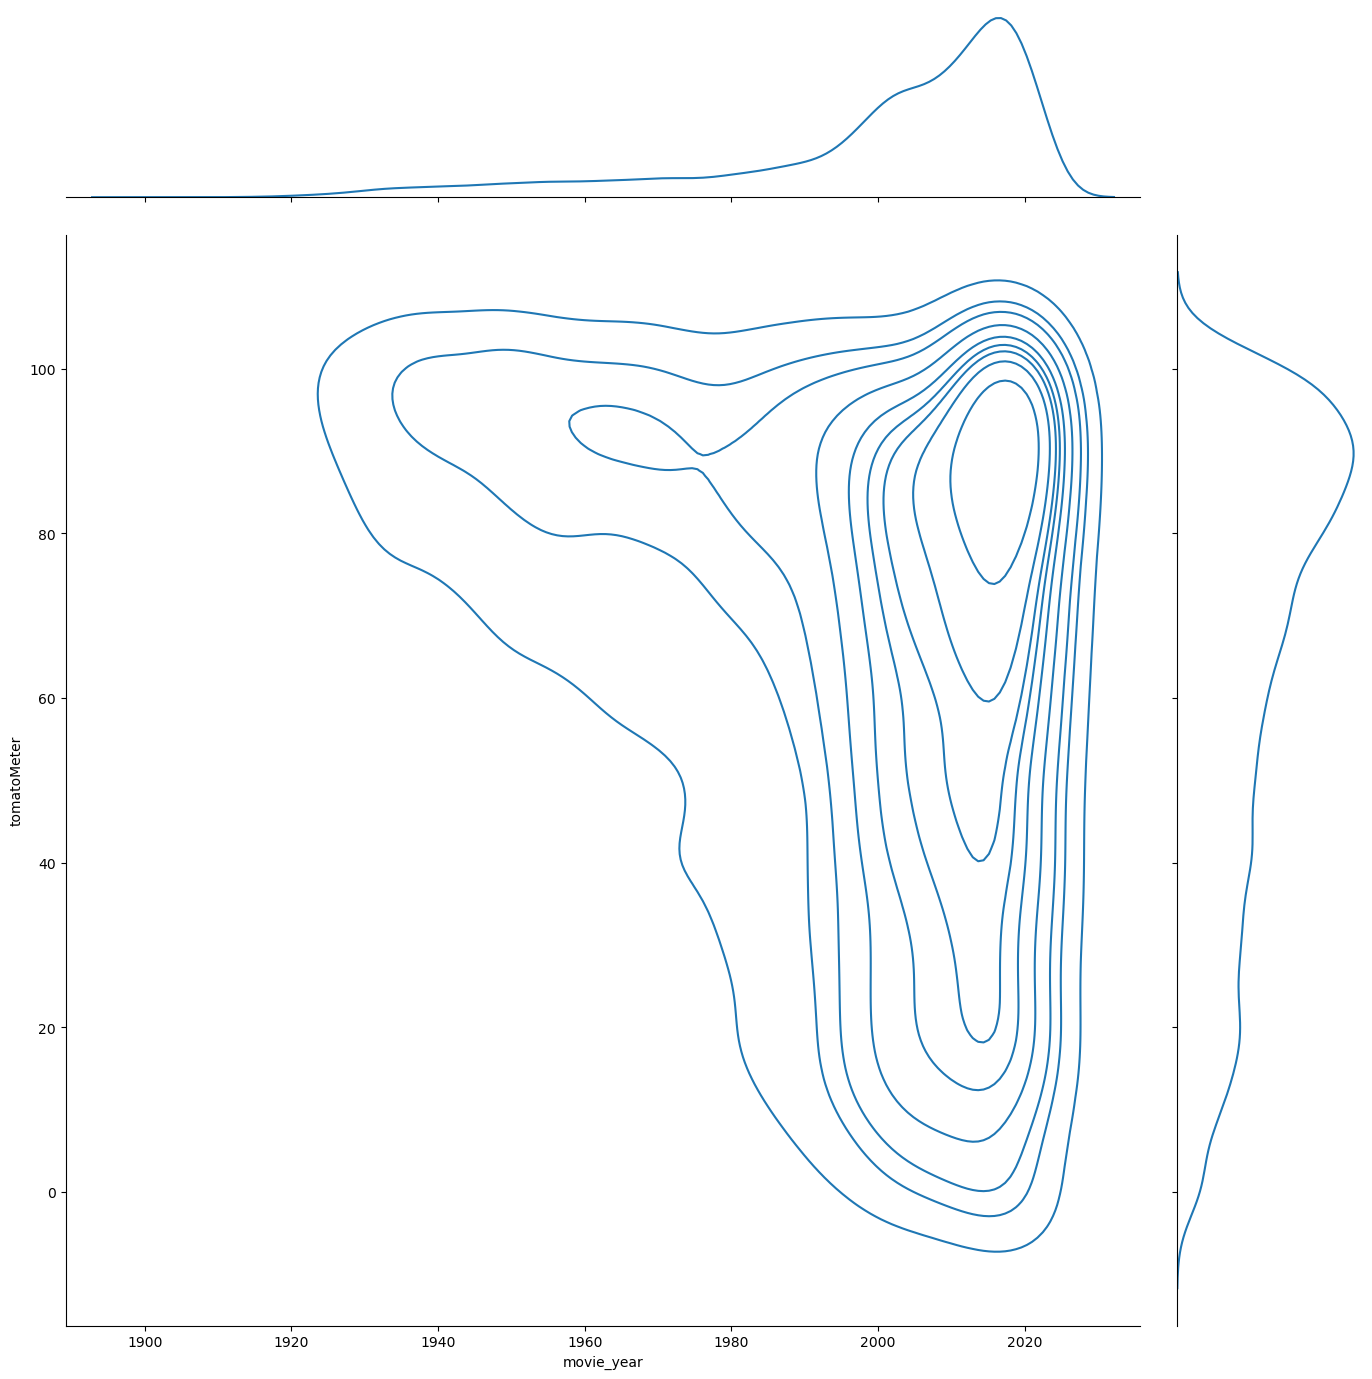

In [ ]:
movies_df = movies_df[(movies_df.tomatoMeter.notnull()) &
                      (movies_df.audienceScore.notnull())]
sns.jointplot(x=movies_df['movie_year'], y=movies_df['tomatoMeter'],
              kind="kde").fig.set_size_inches(15,15)

c:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

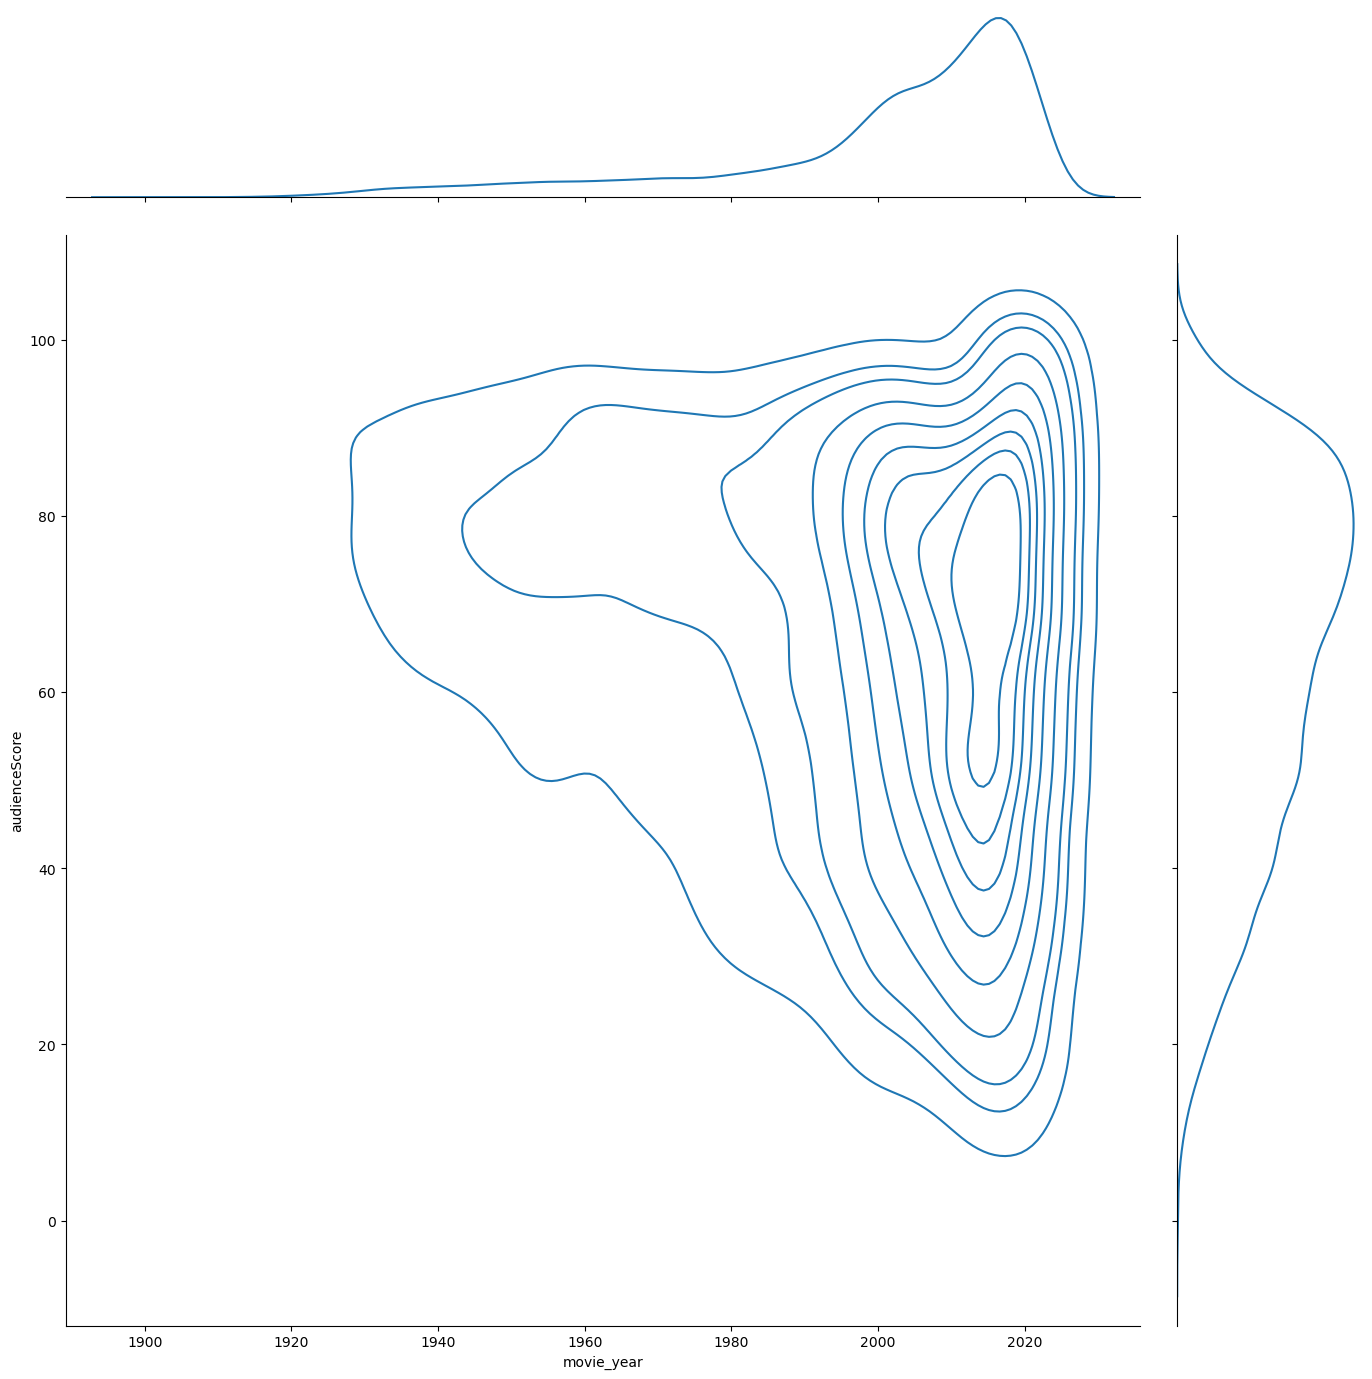

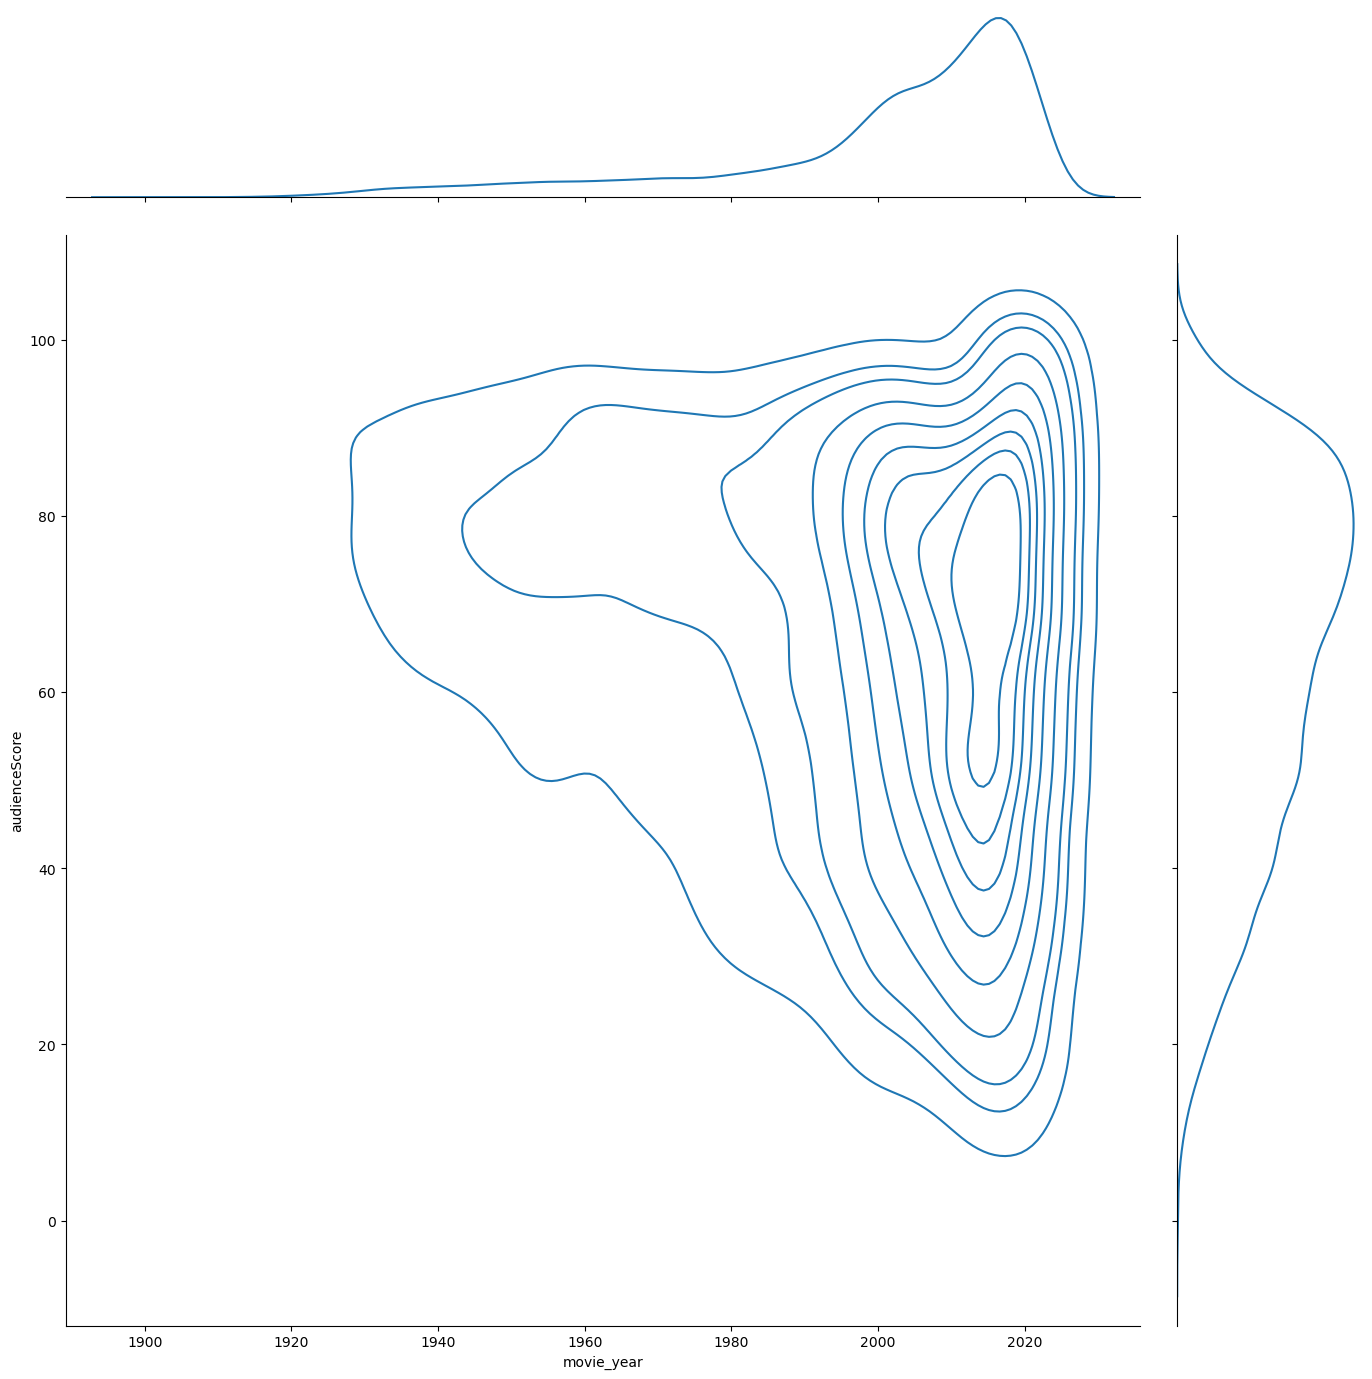

In [ ]:
movies_df['audienceScore'] = movies_df['audienceScore'].replace([np.inf, -np.inf], np.nan)

# Plot the jointplot
sns.jointplot(x=movies_df['movie_year'], y=movies_df['audienceScore'],
              kind="kde").fig.set_size_inches(15,15)
sns.jointplot(x=movies_df['movie_year'], y=movies_df['audienceScore'],
              kind="kde").fig.set_size_inches(15,15)

In [ ]:
a = plt.cm.cool

plt.figure(figsize=(15,10))
count = movies_df['distributor'].value_counts()[:10]
# sns.barplot(count.values, count.index, palette=[a(0.1),a(0.2),a(0.3),a(0.4),a(0.5),a(0.6),a(0.7),a(0.8),a(0.9),a(0.99)])
# for i, v in enumerate(count.values):
#     plt.text(0.8,i,v,color='k',fontsize=14)
# plt.xlabel('Count', fontsize=12)
# plt.ylabel('Studio name', fontsize=12)
# plt.title("Distribution of Studio names", fontsize=16)

<Figure size 1500x1000 with 0 Axes>

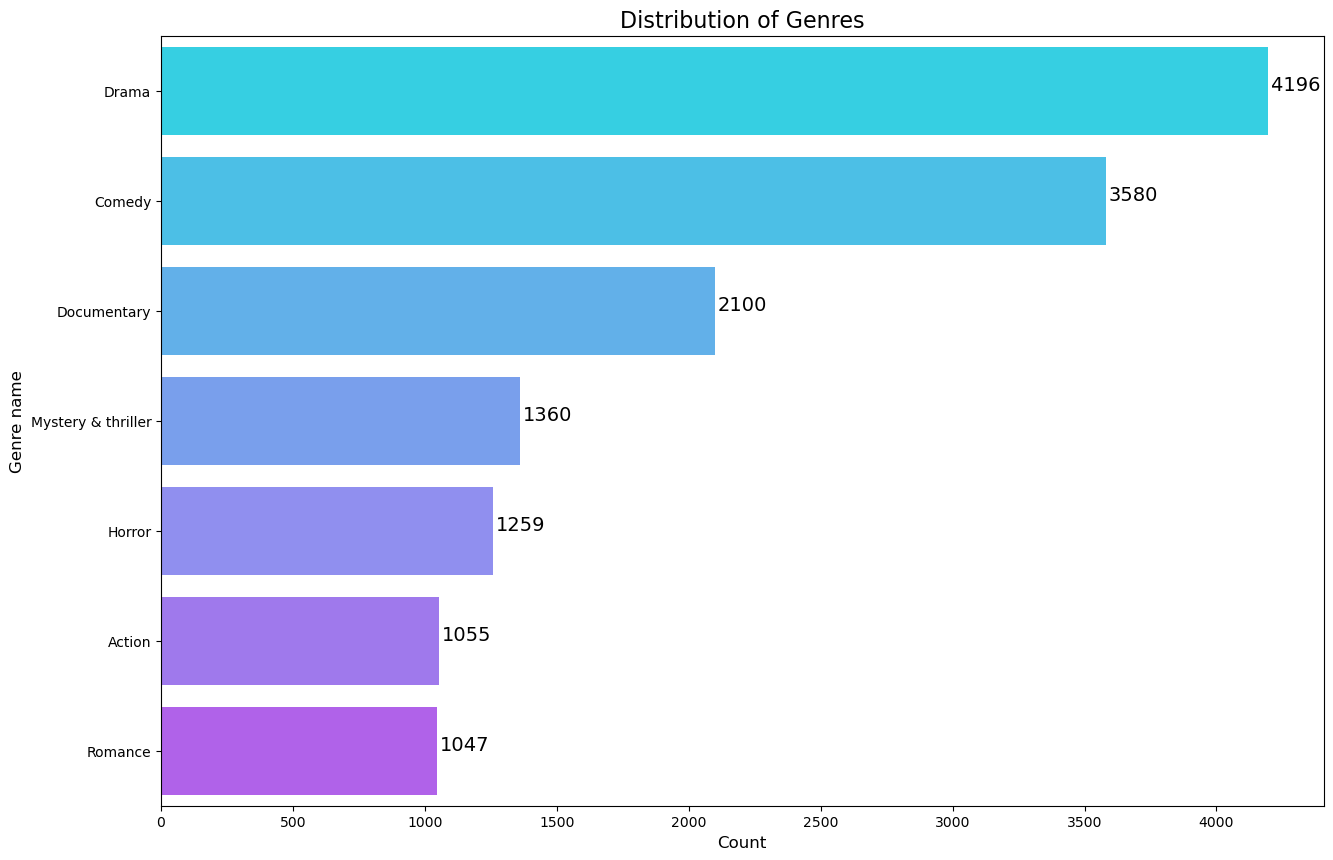

In [ ]:

movies_df['first_genre'] = movies_df['genre'].str.split(',').str[0]

a = plt.cm.cool

plt.figure(figsize=(15,10))
count = movies_df['first_genre'].value_counts()[:7]
sns.barplot(x=count.values, y=count.index, palette=[a(0.1),a(0.2),a(0.3),a(0.4),a(0.5),a(0.6),a(0.7)])
for i, v in enumerate(count.values):
    plt.text(v+10, i, str(v), color='k', fontsize=14)  # Adjust the position of the count label
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre name', fontsize=12)
plt.title("Distribution of Genres", fontsize=16)
plt.show()

In [ ]:
movies_df['tomatometer_status'] = ['Certified-Fresh' if x > 95 else 'Fresh' if x > 65 else 'Rotten' for x in movies_df['tomatoMeter']]
movies_df['audience_status'] = ['Upright' if x > 65 else 'Spilled' for x in movies_df['audienceScore']]

In [ ]:
movie_genres_df

NameError: name 'movie_genres_df' is not defined

In [ ]:
top_genres = list(count.index)
movie_genres_df = movies_df[movies_df['first_genre'].isin(top_genres)]


In [ ]:
movie_genres_df

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix,movie_year,first_genre,tomatometer_status,audience_status
17,1221483-paa,Paa,67.0,50.0,NaN,NaN,2009-12-04,NaN,133.0,Drama,Hindi,R. Balki,R. Balki,$199.2K,Big Pictures,NaN,2009,Drama,Rotten,Upright
20,sarah_palin_you_betcha,Sarah Palin: You Betcha!,61.0,32.0,NaN,NaN,2011-09-30,2017-03-08,90.0,Documentary,English,"Nick Broomfield,Joan Churchill",NaN,$10.5K,Freestyle Releasing,NaN,2011,Documentary,Rotten,Spilled
31,a_state_of_mind_2005,A State of Mind,92.0,89.0,NaN,NaN,2005-08-10,2007-06-11,93.0,Documentary,Korean,Daniel Gordon,NaN,$41.5K,Kino Pictures,NaN,2005,Documentary,Fresh,Upright
49,gun_shy_2017,Salty,38.0,0.0,R,"['Some Sexual Content/Nudity', 'Language', 'Dr...",2017-09-08,2017-11-07,86.0,"Comedy, Action",English (United Kingdom),Simon West,"Toby Davies,Mark Haskell Smith",NaN,Saban Films,NaN,2017,Comedy,Rotten,Spilled
63,race_the_sun,Race the Sun,41.0,22.0,NaN,NaN,1996-03-22,2002-04-30,99.0,Drama,English,Charles T. Kanganis,NaN,$1.7M,NaN,Surround,1996,Drama,Rotten,Spilled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143145,art_isthe_permanent_revolution,Art Is ... the Permanent Revolution,71.0,100.0,NaN,NaN,2012-03-02,2012-08-14,82.0,Documentary,English,Manfred Kirchheimer,NaN,$4.3K,First Run,NaN,2012,Documentary,Certified-Fresh,Upright
143165,shot_the_psycho_spiritual_mantra_of_rock,SHOT! The Psycho-Spiritual Mantra of Rock,45.0,94.0,NaN,NaN,2017-04-07,2017-04-07,95.0,"Documentary, Music",English,Barnaby Clay,NaN,$14.0K,Magnolia Pictures,NaN,2017,Documentary,Fresh,Spilled
143203,octagon,The Octagon,31.0,25.0,NaN,NaN,1980-08-14,2004-10-26,103.0,Action,English,Eric Karson,Leigh Chapman,NaN,American Cinema,NaN,1980,Action,Rotten,Spilled
143213,out_of_death,Out of Death,43.0,0.0,R,"['Violence', 'Language Throughout', 'Drug Use']",2021-07-16,2021-07-16,95.0,Mystery & thriller,English,Mike Burns,Bill Lawrence,NaN,Vertical Entertainment,NaN,2021,Mystery & thriller,Rotten,Spilled


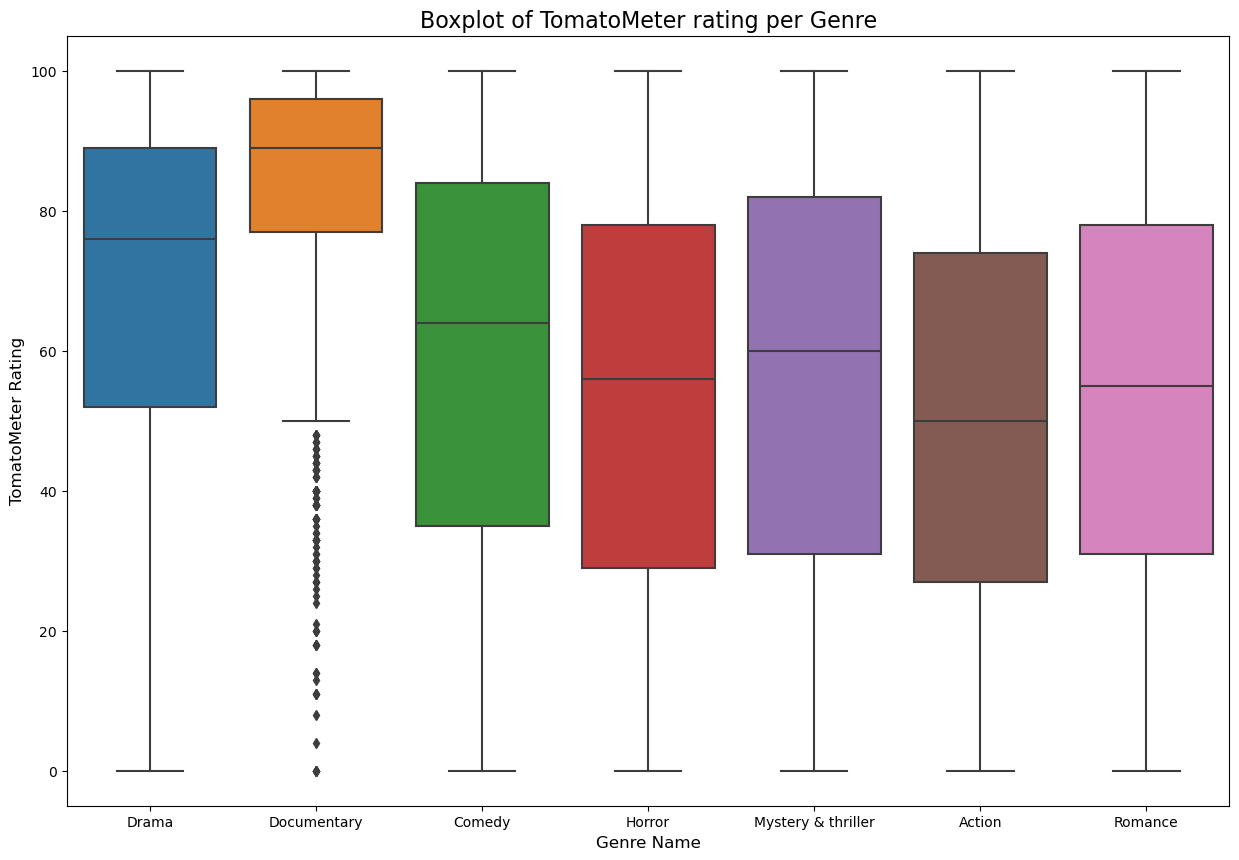

In [ ]:
movie_genres_df = movie_genres_df[pd.notnull(movie_genres_df[['first_genre', 'tomatoMeter', 'tomatometer_status', 'audienceScore', 'audience_status']])]
# movie_genres_df = movie_genres_df[pd.notnull(movie_genres_df[['first_genre', 'tomatometer_rating', 'tomatometer_status', 'tomatometer_count', 'audience_rating', 'audience_status', 'audience_count']])]

plt.figure(figsize=(15, 10))
sns.boxplot(x='first_genre', y='tomatoMeter', data=movie_genres_df)
plt.xlabel("Genre Name",fontsize=12)
plt.ylabel("TomatoMeter Rating",fontsize=12)
plt.title("Boxplot of TomatoMeter rating per Genre", fontsize=16)
plt.show()

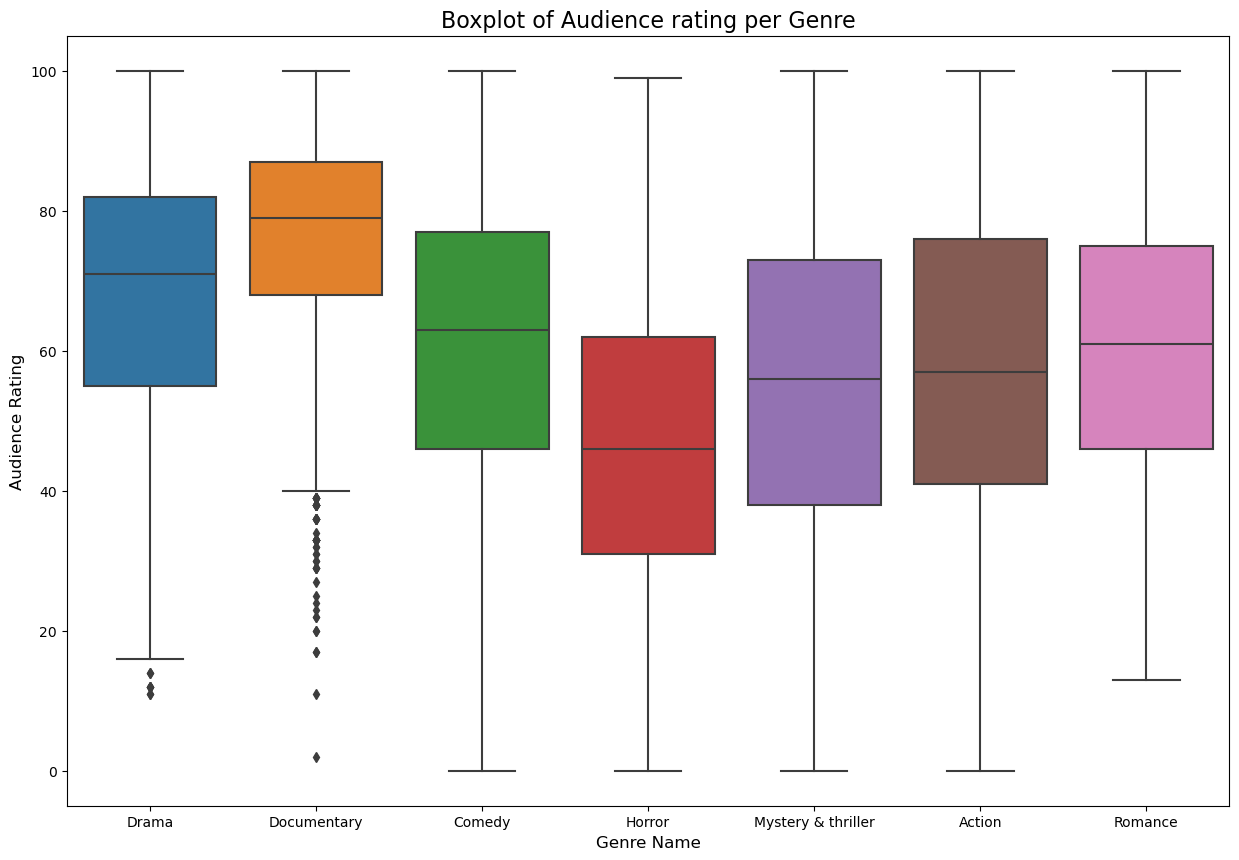

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='first_genre', y='audienceScore', data=movie_genres_df)
plt.xlabel("Genre Name",fontsize=12)
plt.ylabel("Audience Rating",fontsize=12)
plt.title("Boxplot of Audience rating per Genre", fontsize=16)
plt.show()

In [ ]:
genre_rating_tomatometer = pd.crosstab(movie_genres_df.first_genre, movie_genres_df.tomatometer_status, margins=True)
genre_rating_tomatometer.style.background_gradient(cmap='summer_r')

tomatometer_status,Certified-Fresh,Fresh,Rotten,All
first_genre,,,,
Action,34,333,688,1055
Comedy,235,1500,1845,3580
Documentary,554,1253,293,2100
Drama,486,2159,1551,4196
Horror,41,456,762,1259
Mystery & thriller,68,540,752,1360
Romance,56,341,650,1047
All,1474,6582,6541,14597


In [ ]:
genre_rating_audience = pd.crosstab(movie_genres_df.first_genre, movie_genres_df.audience_status, margins=True)
genre_rating_audience.style.background_gradient(cmap='summer_r')

audience_status,Spilled,Upright,All
first_genre,,,
Action,648,407,1055
Comedy,1928,1652,3580
Documentary,443,1657,2100
Drama,1697,2499,4196
Horror,989,270,1259
Mystery & thriller,870,490,1360
Romance,606,441,1047
All,7181,7416,14597


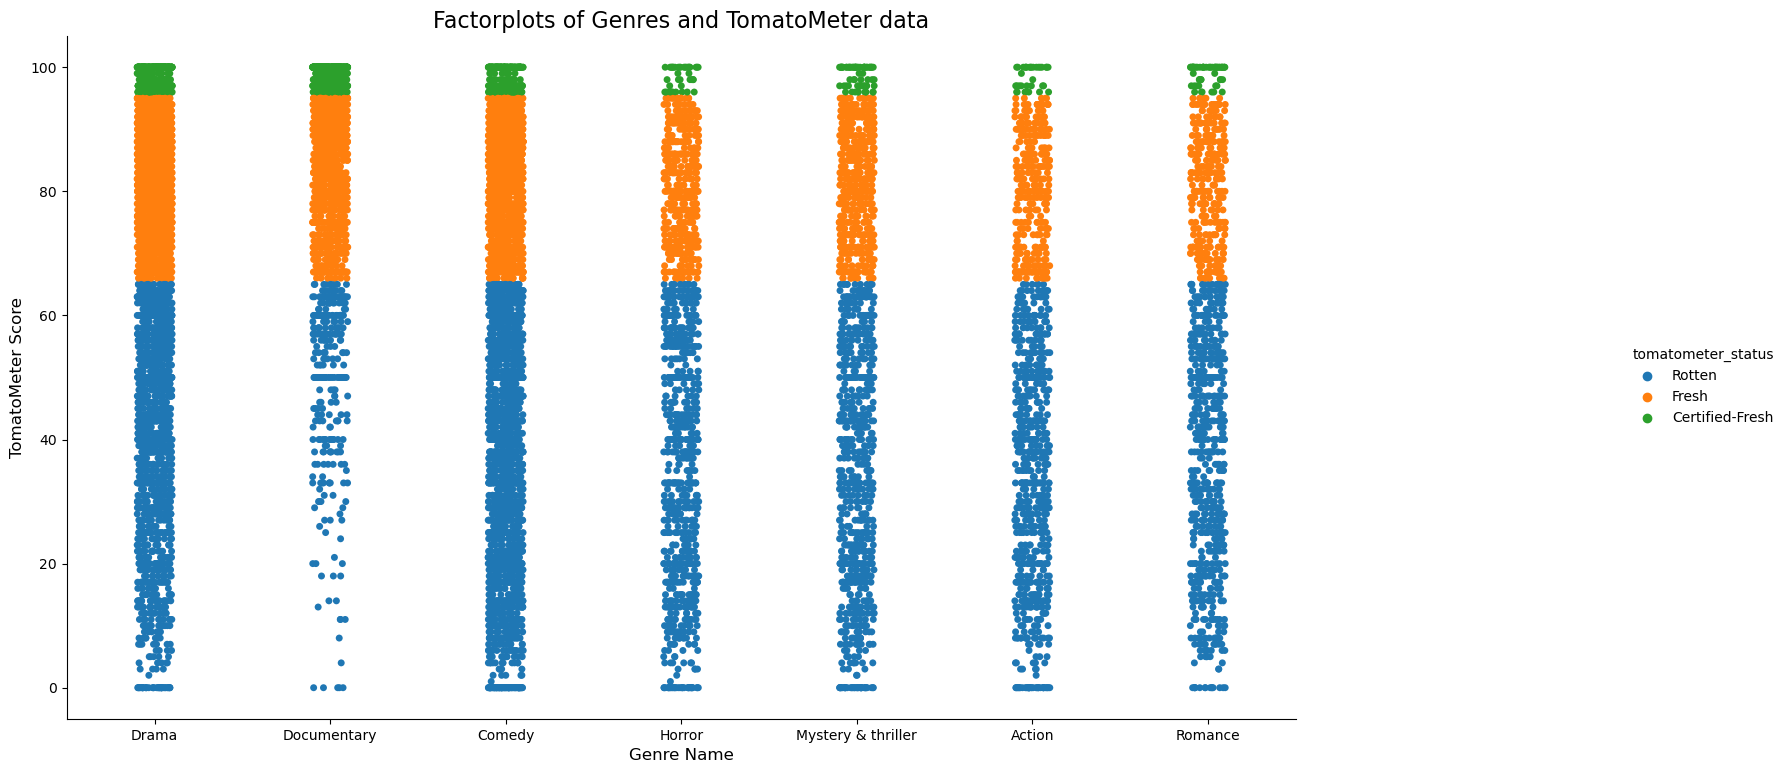

In [ ]:
# avoiding the "factorplot" error message
import warnings
warnings.filterwarnings("ignore")

sns.catplot(x='first_genre', y='tomatoMeter', hue='tomatometer_status', data=movie_genres_df)
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.xlabel("Genre Name",fontsize=12)
plt.ylabel("TomatoMeter Score",fontsize=12)
plt.title("Factorplots of Genres and TomatoMeter data", fontsize=16)
plt.show()

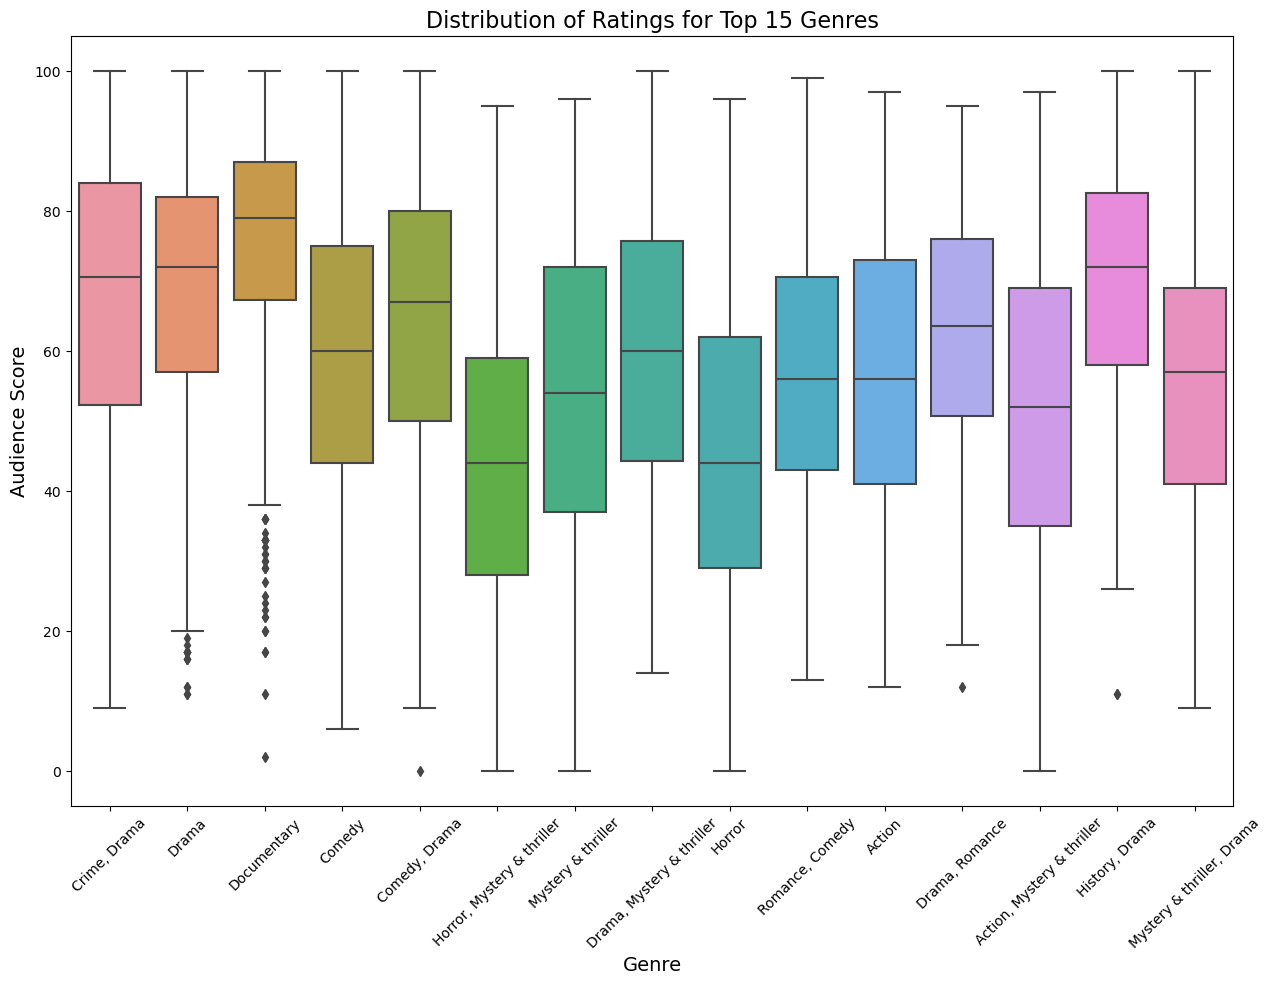

In [ ]:
top_n_genres = 15

# Get the top N most common genres
top_genres = movies_df['genre'].value_counts().head(top_n_genres).index

# Filter the DataFrame to include only the top N genres
movies_subset = movies_df[movies_df['genre'].isin(top_genres)]

# Set the size of the plot
plt.figure(figsize=(15, 10))  # Increase the figure size to 15x10 inches

# Create a box plot
sns.boxplot(x='genre', y='audienceScore', data=movies_subset)

# Customize the plot
plt.title(f'Distribution of Ratings for Top {top_n_genres} Genres', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Audience Score', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

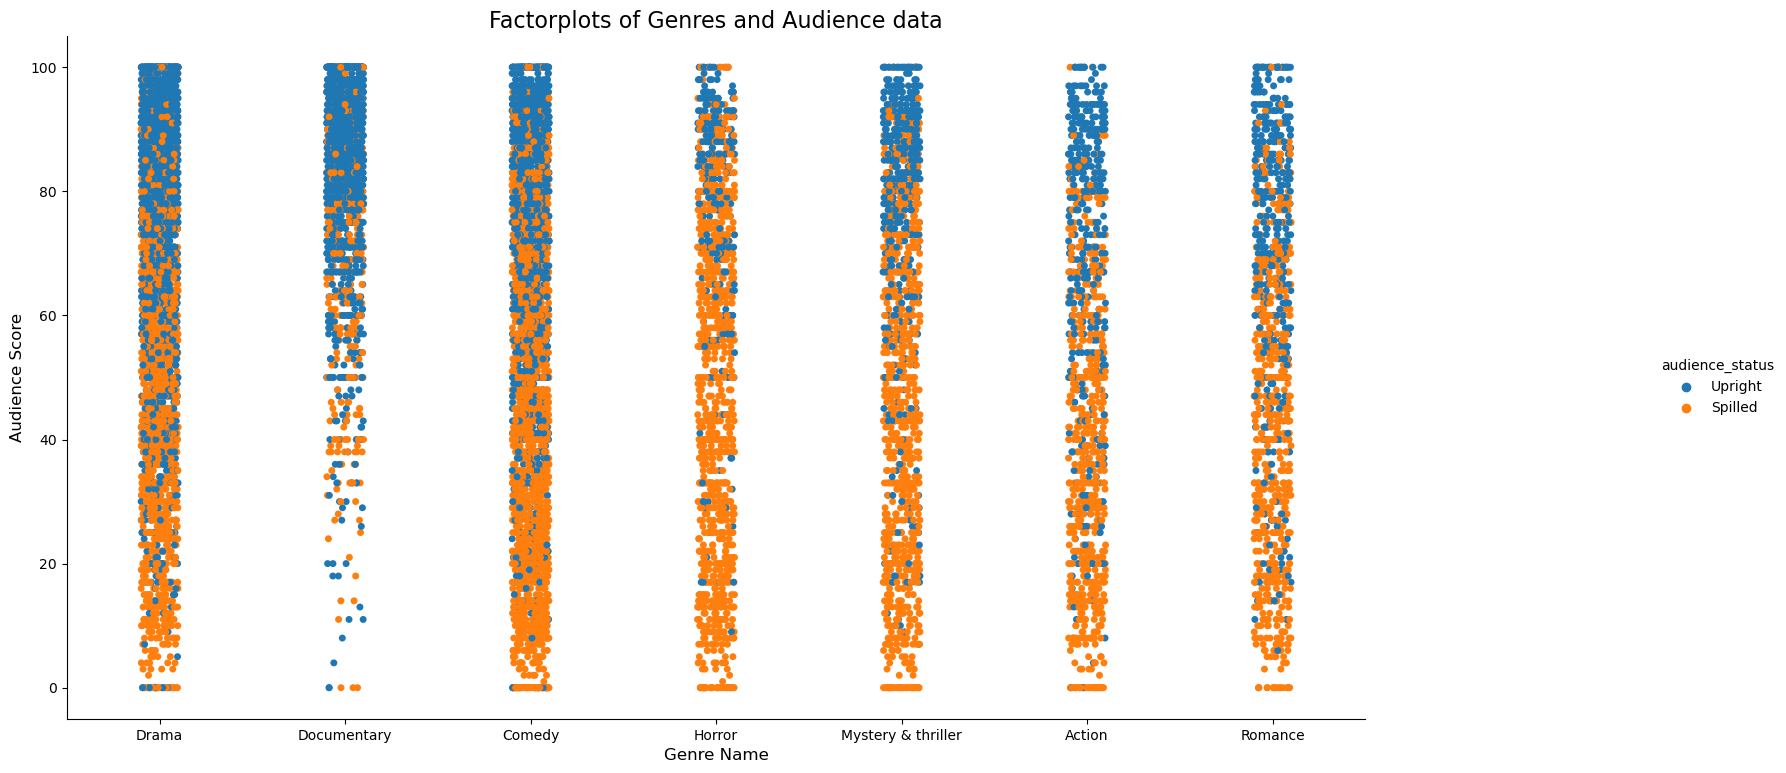

In [ ]:
sns.catplot(x='first_genre', y='tomatoMeter', hue='audience_status', data=movie_genres_df)
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.xlabel("Genre Name",fontsize=12)
plt.ylabel("Audience Score",fontsize=12)
plt.title("Factorplots of Genres and Audience data", fontsize=16)
plt.show()

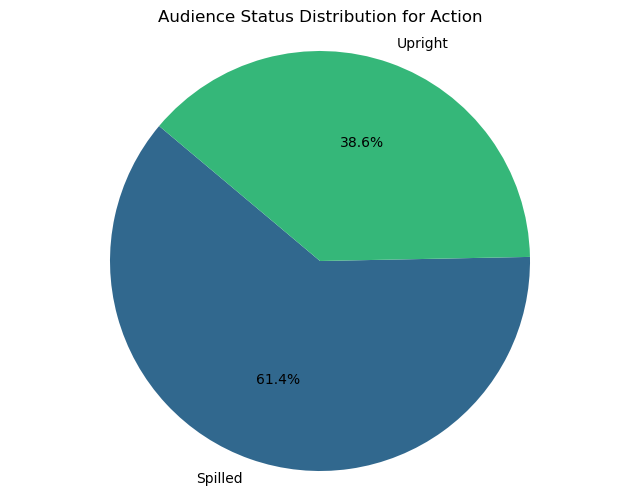

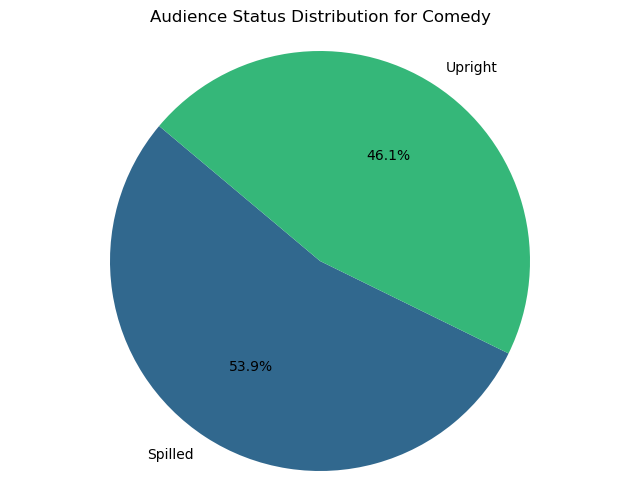

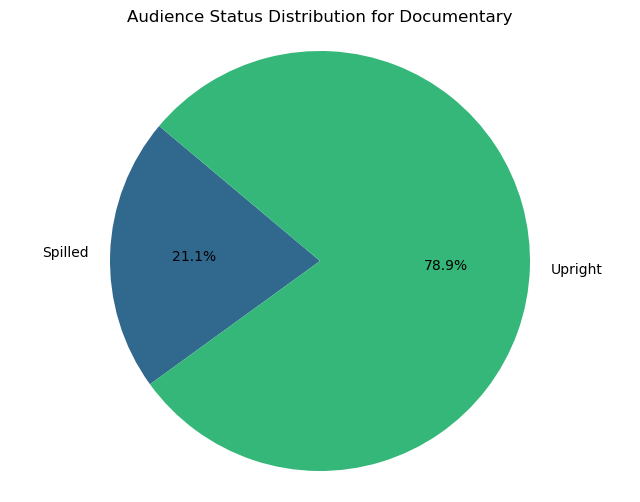

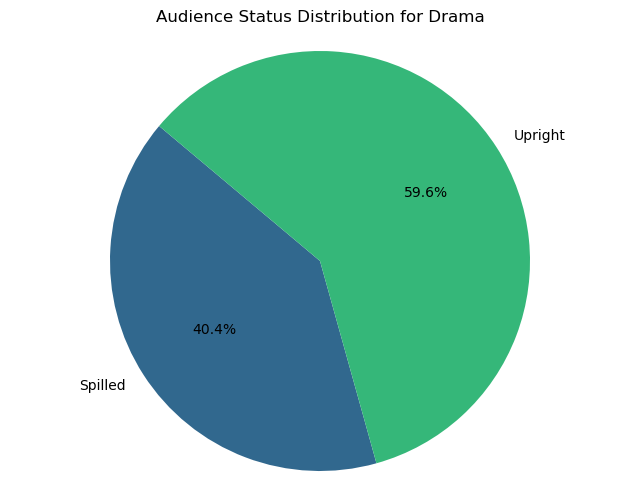

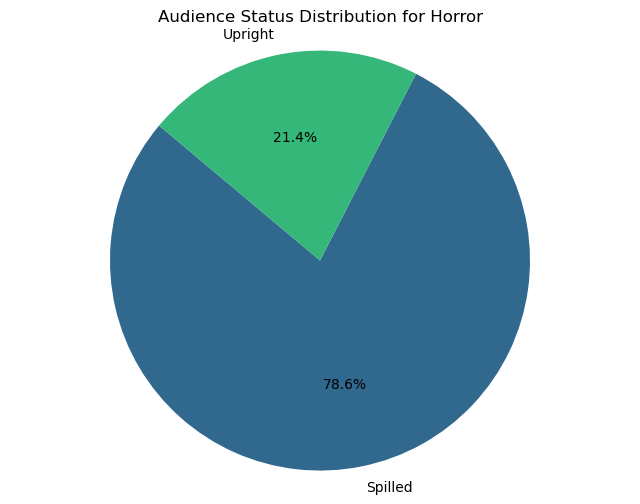

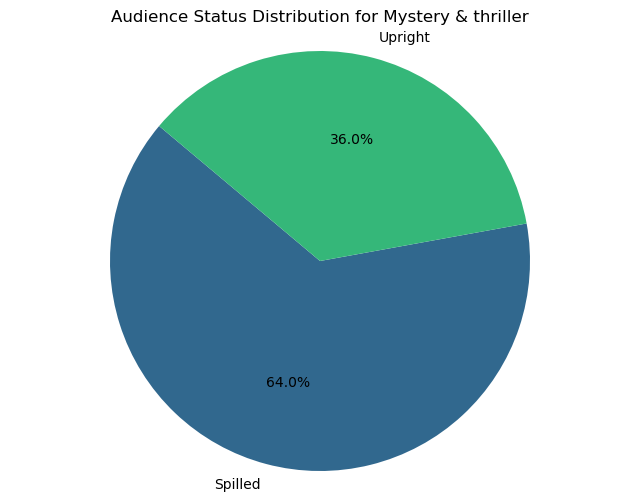

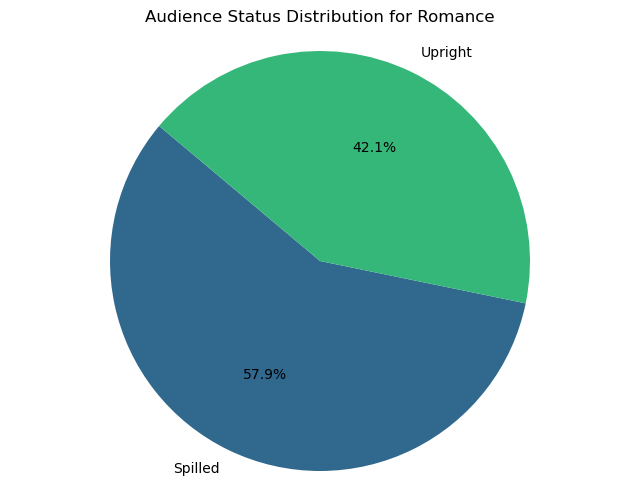

In [ ]:
genre_audience_counts = movie_genres_df.groupby('first_genre')['audience_status'].value_counts().unstack().fillna(0)

# Plot the pie chart for each genre based on audience status
for genre in genre_audience_counts.index:
    plt.figure(figsize=(8, 6))
    plt.pie(genre_audience_counts.loc[genre], labels=genre_audience_counts.columns, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(genre_audience_counts.columns)))
    plt.title(f'Audience Status Distribution for {genre}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

<Figure size 1200x800 with 0 Axes>

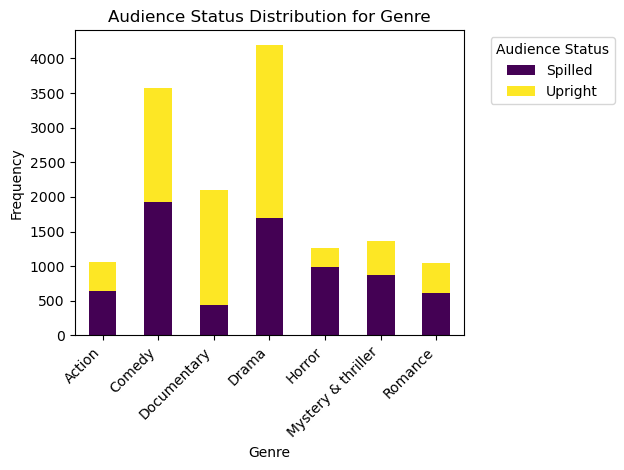

In [ ]:

# Count the number of occurrences of each genre and audience status combination
genre_audience_counts = movie_genres_df.groupby(['first_genre', 'audience_status']).size().unstack(fill_value=0)

# Plotting bar chart for each genre
plt.figure(figsize=(12, 8))
genre_audience_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Audience Status Distribution for Genre')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Audience Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
movies_df

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix,movie_year,first_genre,tomatometer_status,audience_status
5,adrift_2018,Adrift,65.0,69.0,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",English,Baltasar Kormákur,"Aaron Kandell,Jordan Kandell,David Branson Smith",$31.4M,STX Films,NaN,2018,Adventure,Fresh,Spilled
9,1035316-born_to_kill,Born to Kill,74.0,83.0,NaN,NaN,1947-04-30,2016-05-23,92.0,"Crime, Drama",English,Robert Wise,"Eve Greene,Richard Macaulay",NaN,NaN,NaN,1947,Crime,Fresh,Upright
17,1221483-paa,Paa,67.0,50.0,NaN,NaN,2009-12-04,NaN,133.0,Drama,Hindi,R. Balki,R. Balki,$199.2K,Big Pictures,NaN,2009,Drama,Rotten,Upright
20,sarah_palin_you_betcha,Sarah Palin: You Betcha!,61.0,32.0,NaN,NaN,2011-09-30,2017-03-08,90.0,Documentary,English,"Nick Broomfield,Joan Churchill",NaN,$10.5K,Freestyle Releasing,NaN,2011,Documentary,Rotten,Spilled
31,a_state_of_mind_2005,A State of Mind,92.0,89.0,NaN,NaN,2005-08-10,2007-06-11,93.0,Documentary,Korean,Daniel Gordon,NaN,$41.5K,Kino Pictures,NaN,2005,Documentary,Fresh,Upright
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143203,octagon,The Octagon,31.0,25.0,NaN,NaN,1980-08-14,2004-10-26,103.0,Action,English,Eric Karson,Leigh Chapman,NaN,American Cinema,NaN,1980,Action,Rotten,Spilled
143205,catherine_called_birdy,Catherine Called Birdy,63.0,88.0,NaN,NaN,2022-09-23,2022-10-07,108.0,"Adventure, Comedy, Drama",English,Lena Dunham,Lena Dunham,NaN,Amazon Studios,NaN,2022,Adventure,Fresh,Spilled
143213,out_of_death,Out of Death,43.0,0.0,R,"['Violence', 'Language Throughout', 'Drug Use']",2021-07-16,2021-07-16,95.0,Mystery & thriller,English,Mike Burns,Bill Lawrence,NaN,Vertical Entertainment,NaN,2021,Mystery & thriller,Rotten,Spilled
143247,summering,Summering,40.0,34.0,PG-13,['Some Thematic Material'],2022-08-12,NaN,87.0,Drama,English,James Ponsoldt,"James Ponsoldt,Benjamin Percy",$55.9K,Bleecker Street,NaN,2022,Drama,Rotten,Spilled


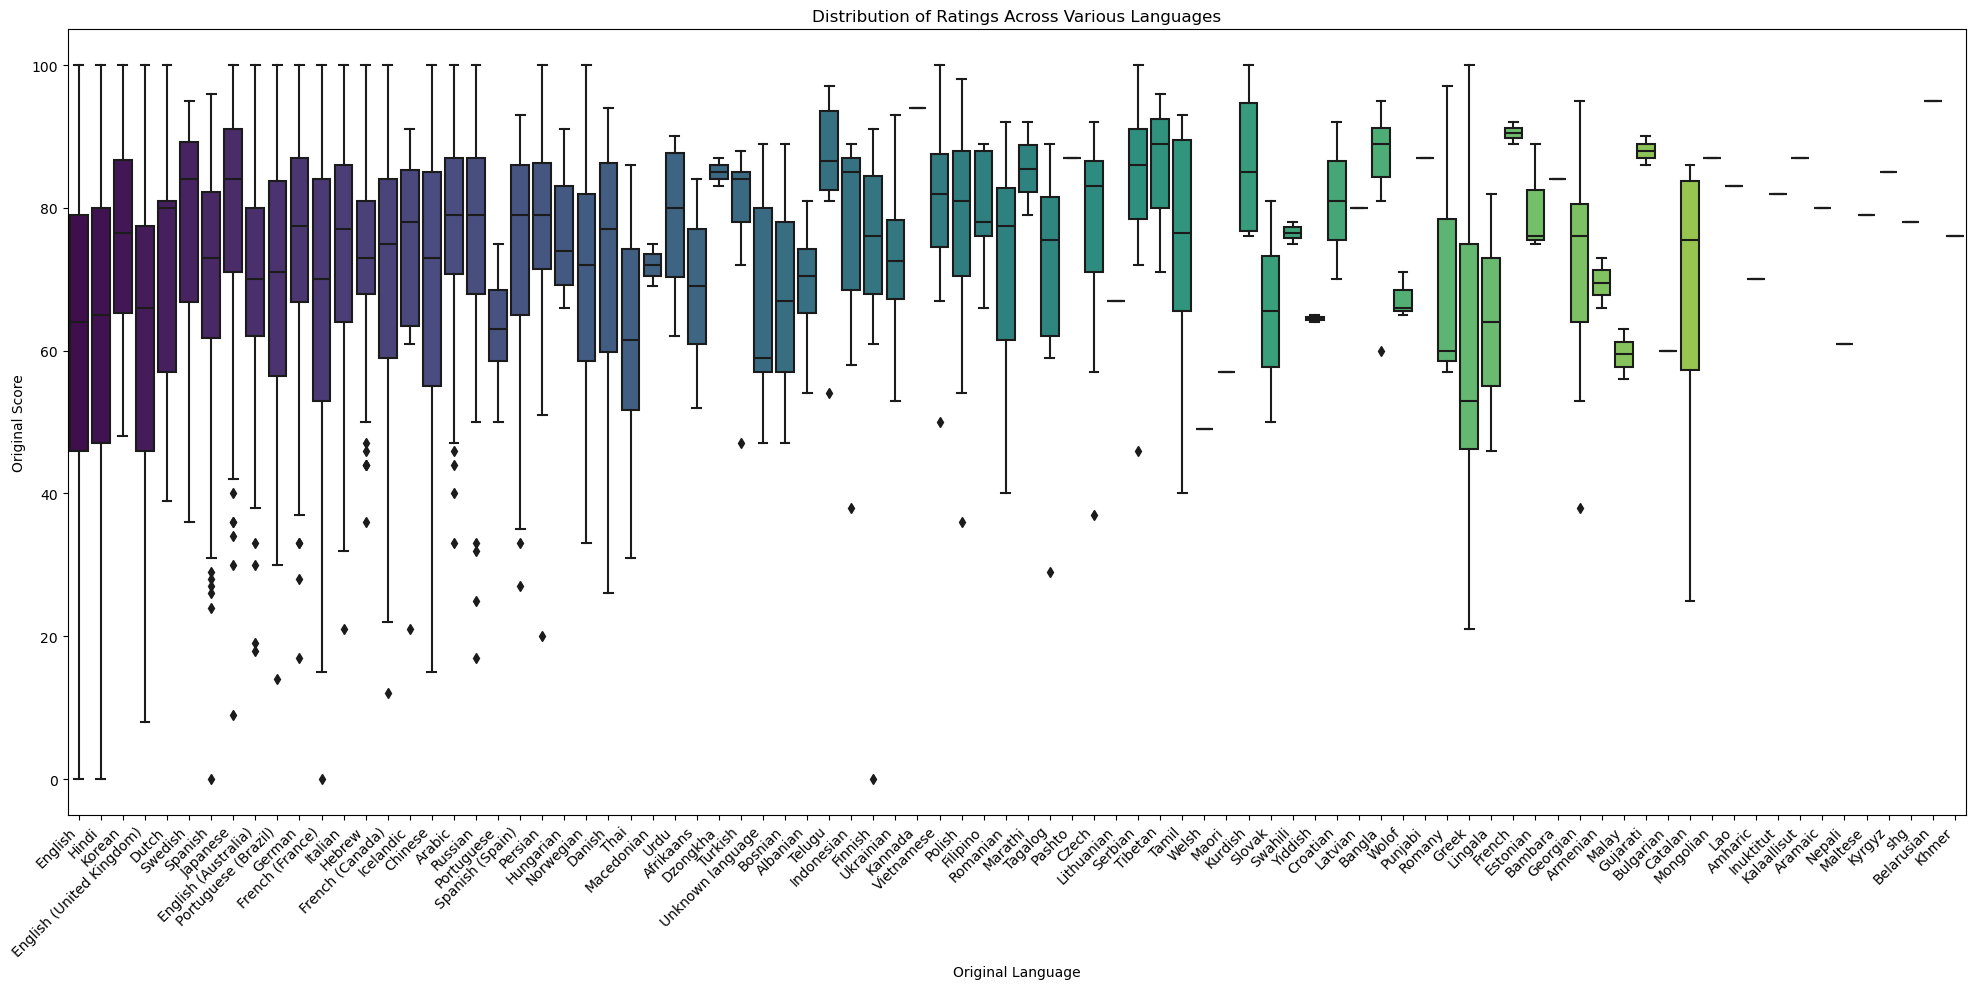

In [ ]:

# Plotting boxplot for distribution of ratings across languages
plt.figure(figsize=(20, 10))
sns.boxplot(data=movies_df, x='originalLanguage', y='audienceScore', palette='viridis')
plt.title('Distribution of Ratings Across Various Languages')
plt.xlabel('Original Language')
plt.ylabel('Original Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

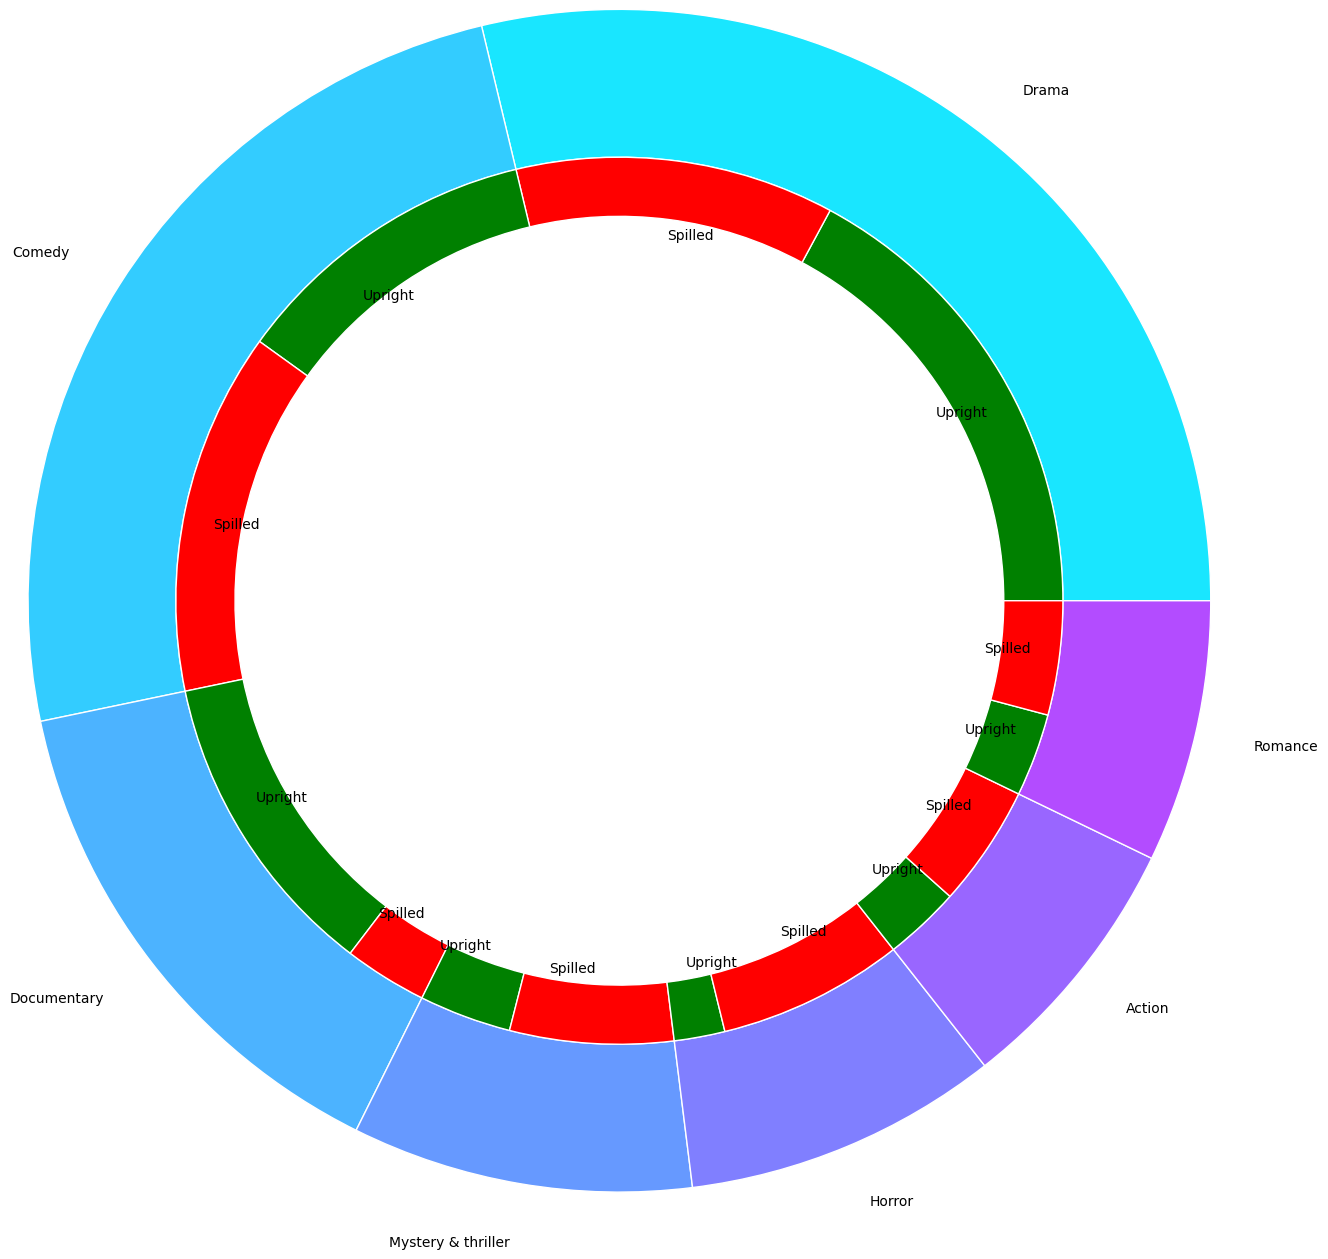

In [ ]:
group_names = movie_genres_df.first_genre.value_counts().head(7).index
group_size = movie_genres_df.first_genre.value_counts().head(7)
subgroup_names = ['Upright','Spilled', 'Upright','Spilled', 'Upright','Spilled', 'Upright','Spilled',
                  'Upright','Spilled', 'Upright','Spilled', 'Upright','Spilled']
size_list = []
for element in group_names:
    size_list.append(genre_rating_audience.loc[element]['Upright'])
    size_list.append(genre_rating_audience.loc[element]['Spilled'])
subgroup_size = size_list

fig, ax = plt.subplots()
ax.axis('equal')
outter_pie, _ = ax.pie(group_size, radius=4, labels=group_names,
                       colors=[a(0.1),a(0.2),a(0.3),a(0.4),a(0.5),a(0.6),a(0.7)])
plt.setp(outter_pie, width=1, edgecolor='white') 
inner_pie, _ = ax.pie(subgroup_size, radius=3, labels=subgroup_names, labeldistance=0.83,
                      colors=['green','red', 'green','red', 'green','red', 'green','red',
                              'green','red', 'green','red', 'green','red'])
plt.setp(inner_pie, width=0.4, edgecolor='white')
plt.margins(0,0)
plt.show()

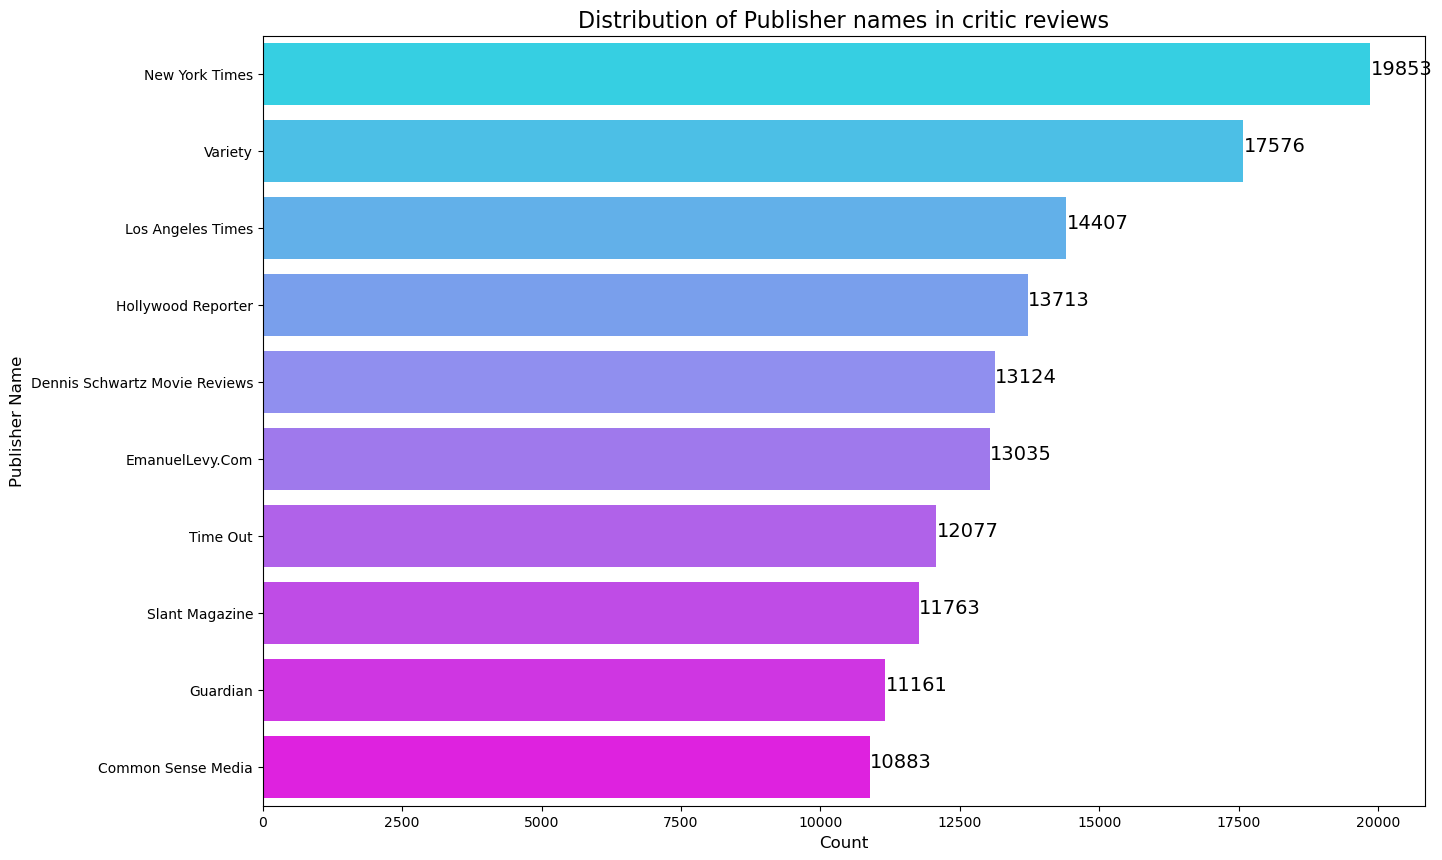

In [ ]:
a = plt.cm.cool

plt.figure(figsize=(15,10))
count = reviews_df['publicatioName'].value_counts()[:10]
sns.barplot(x=count.values, y=count.index, palette=[a(0.1),a(0.2),a(0.3),a(0.4),a(0.5),a(0.6),a(0.7),a(0.8),a(0.9),a(0.99)])
for i, v in enumerate(count.values):
    plt.text(v+10, i, str(v), color='k', fontsize=14)  # Adjust the position of the count label
plt.xlabel('Count', fontsize=12)
plt.ylabel('Publisher Name', fontsize=12)
plt.title("Distribution of Publisher names in critic reviews", fontsize=16)
plt.show()

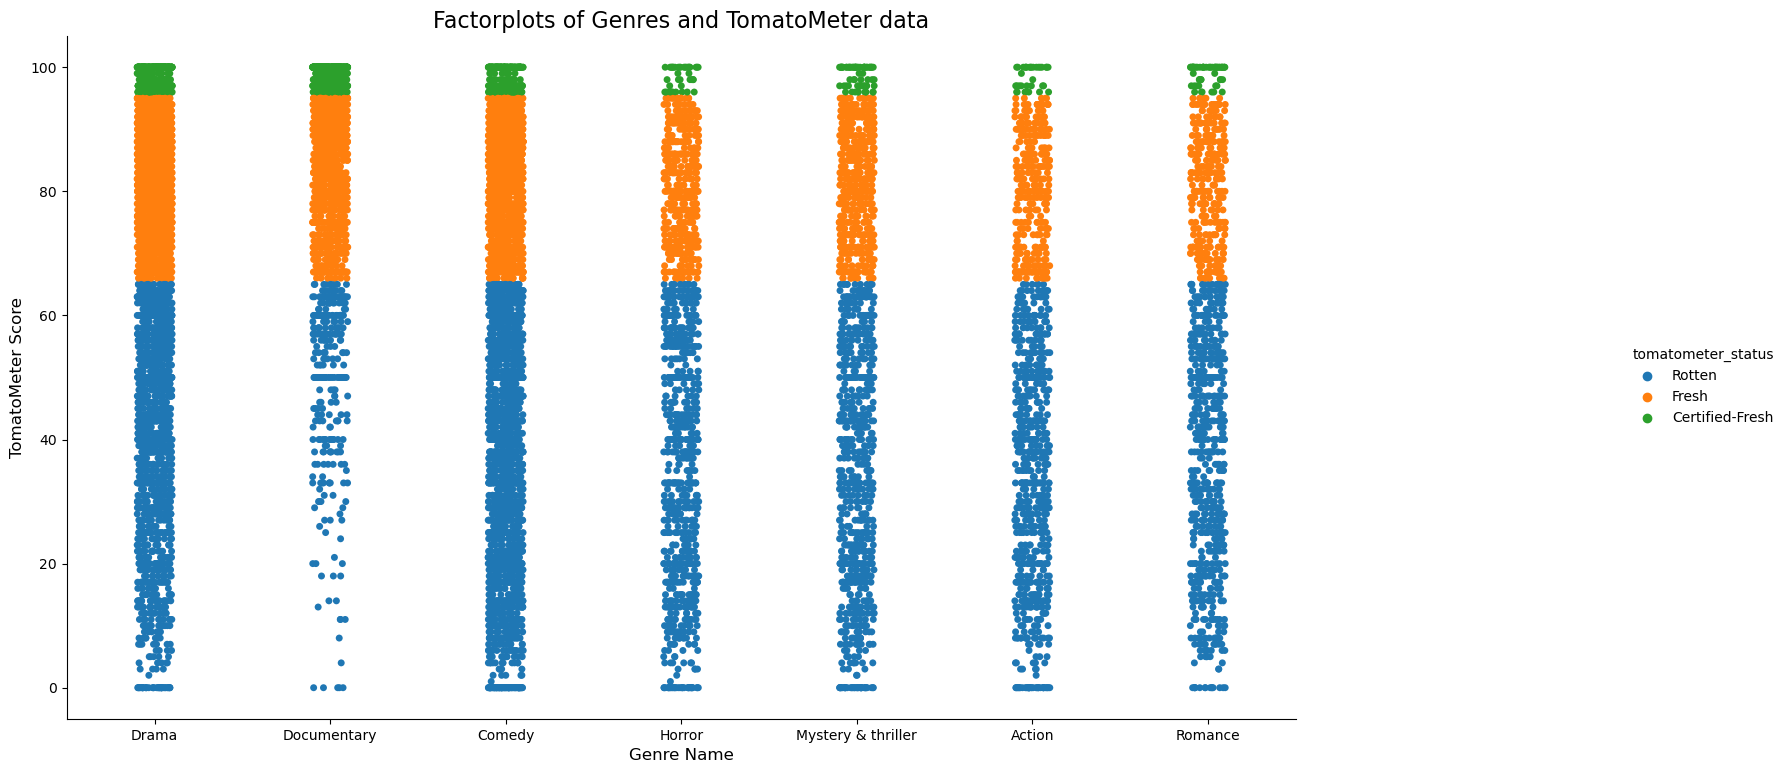

In [ ]:
# avoiding the "factorplot" error message
import warnings
warnings.filterwarnings("ignore")

sns.catplot(x='first_genre', y='tomatoMeter', hue='tomatometer_status', data=movie_genres_df)
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.xlabel("Genre Name",fontsize=12)
plt.ylabel("TomatoMeter Score",fontsize=12)
plt.title("Factorplots of Genres and TomatoMeter data", fontsize=16)
plt.show()

In [ ]:
def cleaning_originalScores(x):
    x = re.sub(' +', '', x)
    if '/' in x: # rating is numeric, but need to transform it in score out of 10
        numer = float(x[:x.index('/')])
        denom = float(x[x.index('/')+1:])
        if (denom >= numer) and (denom > 0):
            return round(numer * (10 / denom), 2)
        else:
            return np.nan
    else: # rating is non-numeric
        if x == 'A':
            return 10
        elif x == 'A-':
            return 9.25
        elif x == 'B+':
            return 8.25
        elif x == 'B':
            return 7.5
        elif x == 'B-':
            return 6.75
        elif x == 'C+':
            return 5.75
        elif x == 'C':
            return 5
        elif x == 'C-':
            return 4.25
        elif x == 'D+':
            return 3.25
        elif x == 'D':
            return 2.5
        elif x == 'D-':
            return 1.75
        elif x == 'F':
            return 0
        
pattern = r'^([A-Z][\+-]?|\d+/\d+|\d+\.\d+/\d+(\.\d+)?)$'

review_scores_df = reviews_df[reviews_df.originalScore.notnull() & reviews_df.originalScore.str.contains(pattern)]
review_scores_df['originalScore'] = review_scores_df['originalScore'].apply(cleaning_originalScores)
review_scores_df['originalScore'] = pd.to_numeric(review_scores_df['originalScore'], errors='coerce')
review_scores_df = review_scores_df[(review_scores_df.originalScore.notnull()) & (review_scores_df.reviewText.notnull())]
review_scores_df['creationDate'] = pd.to_datetime(review_scores_df['creationDate'])
review_scores_df['review_year'] = review_scores_df['creationDate'].apply(lambda x: x.year)
review_scores_df = review_scores_df[review_scores_df['review_year'] >= 2000]

C:\Users\vishn\AppData\Local\Temp\ipykernel_73576\3166964883.py:38: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



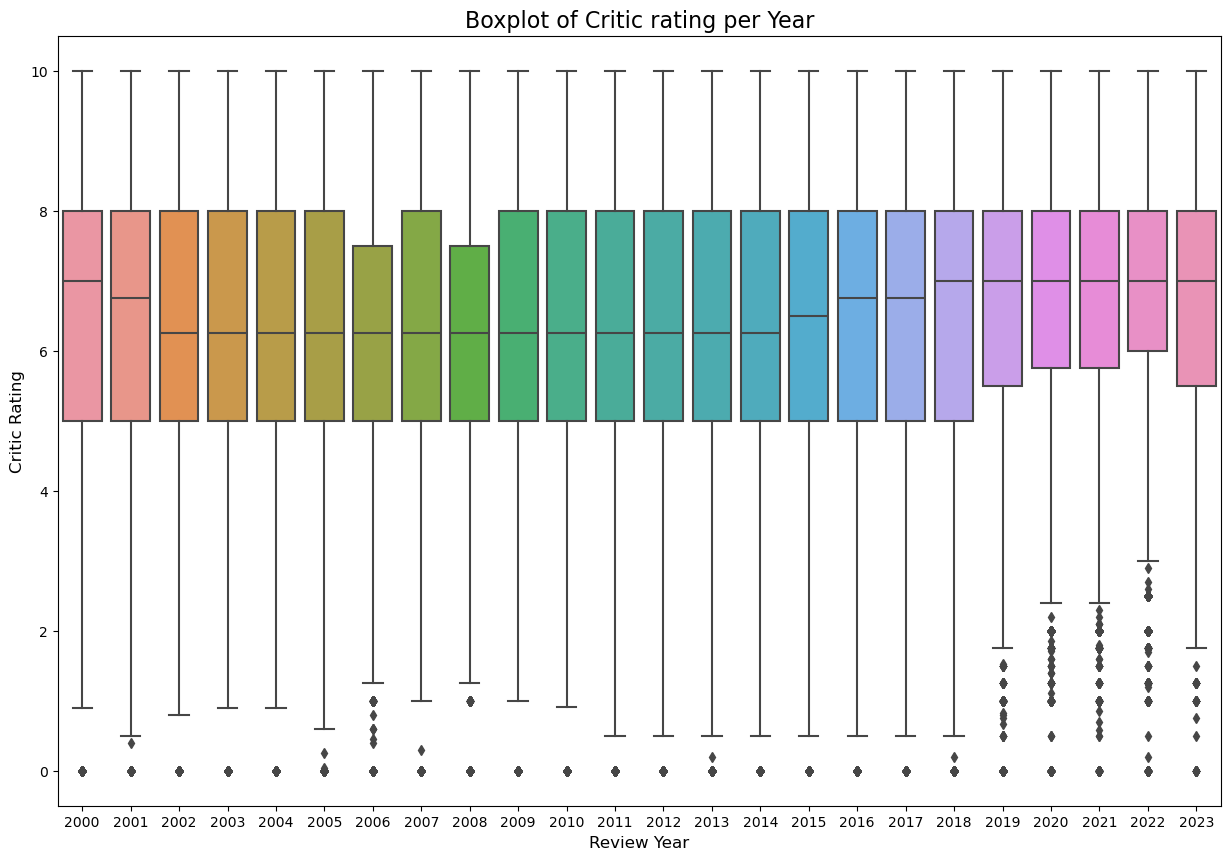

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='review_year', y='originalScore', data=review_scores_df)
plt.xlabel("Review Year",fontsize=12)
plt.ylabel("Critic Rating",fontsize=12)
plt.title("Boxplot of Critic rating per Year", fontsize=16)
plt.show()

In [ ]:
stopwords = set(STOPWORDS)

def topicWordCloud(subset):
    wordcloud = WordCloud(width=1800, height=1200,
                      background_color='white',
                      stopwords=stopwords,
                      max_words=200,
                      min_font_size=20,
                      random_state=42).generate(str(subset))
    return wordcloud

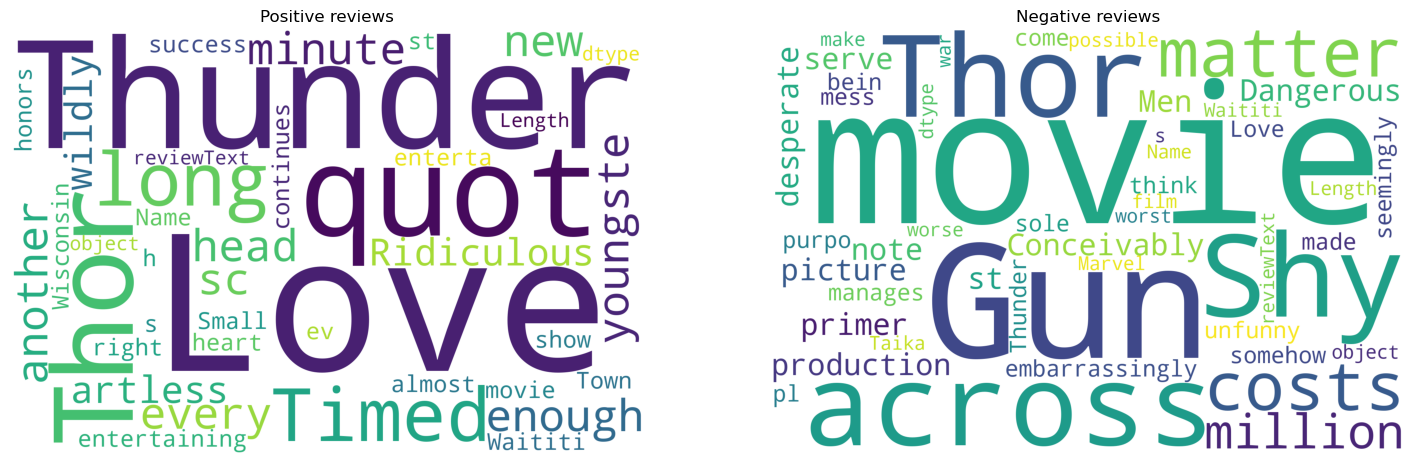

In [ ]:
positive_reviews_df = review_scores_df[review_scores_df['originalScore'] >= 7.5]['reviewText']
negative_reviews_df = review_scores_df[review_scores_df['originalScore'] <= 2.5]['reviewText']

fig = plt.figure(figsize=(18, 12), facecolor=None)
for i in range(2):
    ax = fig.add_subplot(1, 2, i+1)
    if i+1 == 1:
        subset= positive_reviews_df
        plot_title = 'Positive reviews'
    elif i+1 == 2:
        subset = negative_reviews_df
        plot_title = 'Negative reviews'
    wordcloud = topicWordCloud(subset)
    plt.title(plot_title)
    ax.imshow(wordcloud)
    ax.axis('off')

In [ ]:
# positive_reviews_df = review_scores_df[review_scores_df['originalScore'] >= 7.5]['reviewText']
# negative_reviews_df = review_scores_df[review_scores_df['originalScore'] <= 2.5]['reviewText']
positive_reviews_df

NameError: name 'positive_reviews_df' is not defined